# Basic Sunburst Plot with plotly

In [78]:
import plotly.express as px

df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'])
fig.show()

# Another Sunburst Plot with plotly

In [80]:
import plotly.express as px
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()

# A pie plot is a circle chart mainly used to represent proportion of part of given data with respect to the whole data. Each slice represents a proportion and on total of the proportion becomes a whole. We can use bar plots in visualizing:

## Sales turnover percentatge with respect to different products
Monthly expenditure of a Family

In [82]:
## Monthly expenditure of a family
# Random Data
exp_percent= [20, 50, 10,8,12]
house_holdcategories = ['Grocery', 'Rent', 'School Fees','Transport','Savings']

In [83]:
# Use px.pie function to create the chart. Input dataset. 
# Values parameter will set values associated to the sector. 'exp_percent' feature is passed to it.
# labels for the sector are passed to the `house hold categoris` parameter.
fig = px.pie(values=exp_percent, names=house_holdcategories, title='Household Expenditure')
fig.show()

# Airline Dataset
### The Reporting Carrier On-Time Performance Dataset contains information on approximately 200 million domestic US flights reported to the United States Bureau of Transportation Statistics. The dataset contains basic information about each flight (such as date, time, departure airport, arrival airport) and, if applicable, the amount of time the flight was delayed and information about the reason for the delay. This dataset can be used to predict the likelihood of a flight arriving on time.'''


In [85]:
# Read the airline data into pandas dataframe
#!pip install requests
import pandas as pd
import io
import requests

# URL of the CSV file
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv'

# Fetch the data from the URL
response = requests.get(url)
response.raise_for_status()  # Check that the request was successful

# Read the data into a pandas DataFrame
airline_data = pd.read_csv(io.StringIO(response.text), encoding="ISO-8859-1", 
                           dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                  'Div2Airport': str, 'Div2TailNum': str})

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [86]:
# Preview the first 5 lines of the loaded data 
airline_data.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118824,1993,3,9,25,6,1993-09-25,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,634825,1994,4,11,12,6,1994-11-12,HP,19991,HP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1888125,2017,3,8,17,4,2017-08-17,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# Shape of the data
airline_data.shape

(27000, 110)

In [88]:
# Randomly sample 500 data points. Setting the random state to be 42 so that we get same result.
data = airline_data.sample(n=500, random_state=42)

In [89]:
# Get the shape of the trimmed data
data.shape

(500, 110)

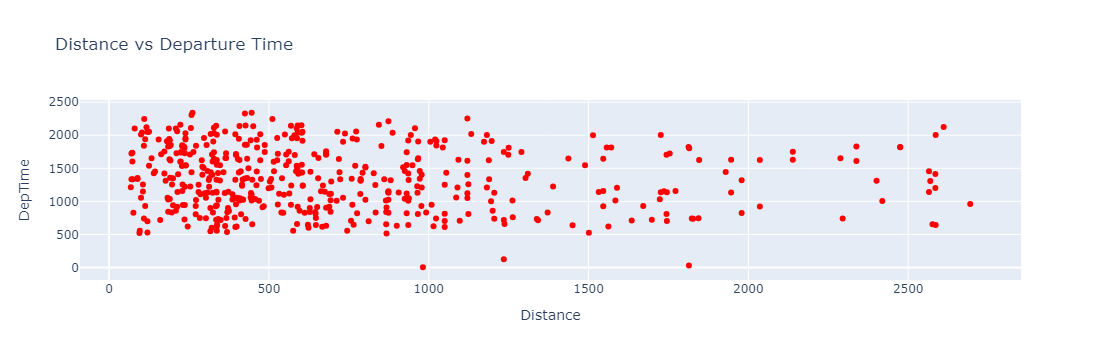

In [90]:
import plotly.graph_objs as go
fig=go.Figure()
#Next we will create a scatter plot by using the add_trace function and use the go.scatter() function within it
# In go.Scatter we define the x-axis data,y-axis data and define the mode as markers with color of the marker as red
fig.add_trace(go.Scatter(x=data['Distance'], y=data['DepTime'], mode='markers', marker=dict(color='red')))
fig.update_layout(title='Distance vs Departure Time', xaxis_title='Distance', yaxis_title='DepTime')
# Display the figure
fig.show()

# Bar Chart

Let us use a bar chart to extract number of flights from a specific airline that goes to a destination

This plot should contain the following

Title as Total number of flights to the destination state split by reporting air.
x-axis label should be DestState
y-axis label should be Flights
Create a new dataframe called bar_data which contains 2 columns DestState and Flights.Here flights indicate total number of flights in each combination.

In [92]:
# Group the data by destination state and reporting airline. Compute total number of flights in each combination
bar_data = data.groupby('DestState')['Flights'].sum().reset_index()

In [93]:
# Display the data
bar_data

,DestState,Flights
0,AK,4.0
1,AL,3.0
2,AZ,8.0
3,CA,68.0
4,CO,20.0
5,CT,5.0
6,FL,32.0
7,GA,27.0
8,HI,5.0
9,IA,1.0


## Illustration of Bar Chart, Bubble chart, Pie Chart, and SUnburst Chart

In [95]:
#Bar Chart
fig = px.bar(bar_data, x="DestState", y="Flights", title='Total number of flights to the destination state split by reporting airline') 
fig.show()

#Bubble Chart
# Group the data by reporting airline and get number of flights
bub_data = data.groupby('Reporting_Airline')['Flights'].sum().reset_index()
fig = px.scatter(bub_data, x="Reporting_Airline", y="Flights", size="Flights",
                 hover_name="Reporting_Airline", title='Reporting Airline vs Number of Flights', size_max=60)
fig.show()

#Pie Chart
fig = px.pie(data, values='Flights', names='DistanceGroup', title='Flight propotion by Distance Group')
fig.show()

#Sunburst Chart
fig = px.sunburst(data, path=['Month', 'DestStateName'], values='Flights',title='Flight Distribution Hierarchy')
fig.show()

### The above examples shows how to use plotly.graph_objects and plotly.express for creating plots and charts. 
Please visit https://plotly.com/python/plotly-express/ for more information